<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/LS_DS_121_Join_and_Reshape_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# changed by Nov05 on 2019-06-30
# DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/
# module1-join-and-reshape-data/

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-06-03 19:04:56--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.112.205
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.112.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  67.8MB/s    in 2.9s    

2019-06-03 19:05:00 (67.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [5]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [6]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [7]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [8]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

In [0]:
import pandas as pd
import seaborn as sns

In [0]:
aisles_filename = "aisles.csv"
departments_filename = "departments.csv"
op_prior_filename = "order_products__prior.csv"
op_train_filename = "order_products__train.csv"
orders_filename = "orders.csv"
products_filename = "products.csv"

In [0]:
aisles_data = pd.read_csv(aisles_filename)

In [0]:
departments_data = pd.read_csv(departments_filename)

In [0]:
op_prior_data = pd.read_csv(op_prior_filename)

In [0]:
op_train_data = pd.read_csv(op_train_filename)

In [0]:
orders_data = pd.read_csv(orders_filename)

In [0]:
products_data = pd.read_csv(products_filename)

### aisles

In [19]:
print(aisles_data.shape)
aisles_data.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


### departments

In [21]:
print(departments_data.shape)
departments_data.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


### order_products__prior

In [24]:
print(op_prior_data.shape)
op_prior_data.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### order_products__train

In [26]:
print(op_train_data.shape)
op_train_data.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### orders

In [30]:
print(orders_data.shape)
orders_data.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### products

In [39]:
print(products_data.shape)
products_data.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Concatenate order_products__prior and order_products__train

In [0]:
op_concat_data = pd.concat([op_prior_data, op_train_data])

In [0]:
assert len(op_concat_data) == len(op_prior_data) + len(op_train_data)

## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [52]:
orders_data.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [65]:
# test run
orders_data[orders_data['user_id']==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [66]:
# result: the first two orders for user id 1
subset = orders_data[orders_data['user_id']==1][orders_data['order_number']<=2]
subset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [67]:
print(subset.columns.tolist())
print(op_train_data.columns.tolist())

['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
['order_id', 'product_id', 'add_to_cart_order', 'reordered']


In [0]:
op_cols = ['order_id', 'product_id']
df1 = pd.merge(subset, op_concat_data[op_cols], how='inner', on='order_id')

In [76]:
df1.shape
df1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id
0,2539329,1,prior,1,2,8,NaN,196
1,2539329,1,prior,1,2,8,NaN,14084
2,2539329,1,prior,1,2,8,NaN,12427
3,2539329,1,prior,1,2,8,NaN,26088
4,2539329,1,prior,1,2,8,NaN,26405
5,2398795,1,prior,2,3,7,15.0,196
6,2398795,1,prior,2,3,7,15.0,10258
7,2398795,1,prior,2,3,7,15.0,12427
8,2398795,1,prior,2,3,7,15.0,13176
9,2398795,1,prior,2,3,7,15.0,26088


Merge with columns from `products`

In [78]:
print(df1.columns.tolist())
print(products_data.columns.tolist())

['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id']
['product_id', 'product_name', 'aisle_id', 'department_id']


In [0]:
p_cols = ['product_id', 'product_name']
df2 = pd.merge(df1, products_data[p_cols], how="inner", on="product_id")

In [82]:
print(df2.shape)
df2

(11, 9)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name
0,2539329,1,prior,1,2,8,NaN,196,Soda
1,2398795,1,prior,2,3,7,15.0,196,Soda
2,2539329,1,prior,1,2,8,NaN,14084,Organic Unsweetened Vanilla Almond Milk
3,2539329,1,prior,1,2,8,NaN,12427,Original Beef Jerky
4,2398795,1,prior,2,3,7,15.0,12427,Original Beef Jerky
5,2539329,1,prior,1,2,8,NaN,26088,Aged White Cheddar Popcorn
6,2398795,1,prior,2,3,7,15.0,26088,Aged White Cheddar Popcorn
7,2539329,1,prior,1,2,8,NaN,26405,XL Pick-A-Size Paper Towel Rolls
8,2398795,1,prior,2,3,7,15.0,10258,Pistachios
9,2398795,1,prior,2,3,7,15.0,13176,Bag of Organic Bananas


In [87]:
df2 = df2.sort_values(by=['order_id', 'user_id', 'order_number', 'order_dow', 'product_id'])
df2

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name
1,2398795,1,prior,2,3,7,15.0,196,Soda
8,2398795,1,prior,2,3,7,15.0,10258,Pistachios
4,2398795,1,prior,2,3,7,15.0,12427,Original Beef Jerky
10,2398795,1,prior,2,3,7,15.0,13032,Cinnamon Toast Crunch
9,2398795,1,prior,2,3,7,15.0,13176,Bag of Organic Bananas
6,2398795,1,prior,2,3,7,15.0,26088,Aged White Cheddar Popcorn
0,2539329,1,prior,1,2,8,NaN,196,Soda
3,2539329,1,prior,1,2,8,NaN,12427,Original Beef Jerky
2,2539329,1,prior,1,2,8,NaN,14084,Organic Unsweetened Vanilla Almond Milk
5,2539329,1,prior,1,2,8,NaN,26088,Aged White Cheddar Popcorn


# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [84]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [85]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [89]:
print(table1.columns.tolist())
print(table1.index.tolist())

['treatmenta', 'treatmentb']
['John Smith', 'Jane Doe', 'Mary Johnson']


In [98]:
# set index to numbers, moving the original index to a column
table1 = table1.reset_index(); table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [100]:
tidy1 = pd.melt(table1, id_vars='index'); tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


## Table 2 --> Tidy

In [0]:
##### LEAVE BLANK --an assignment exercise #####

In [92]:
print(table2.columns.tolist())
print(table2.index.tolist())

['John Smith', 'Jane Doe', 'Mary Johnson']
['treatmenta', 'treatmentb']


In [101]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [103]:
table2 = table2.reset_index(); table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [105]:
tidy2 = pd.melt(table2, id_vars='index'); tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [107]:
tidy1.pivot(index='index', columns='variable', values='value')

variable,treatmenta,treatmentb
index,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [97]:
# compare with table1
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


## Tidy --> Table 2

In [0]:
##### LEAVE BLANK --an assignment exercise #####

In [108]:
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [109]:
tidy2.pivot_table(index='index', columns='variable', values='value')

variable,Jane Doe,John Smith,Mary Johnson
index,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


In [111]:
# compare with table2
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

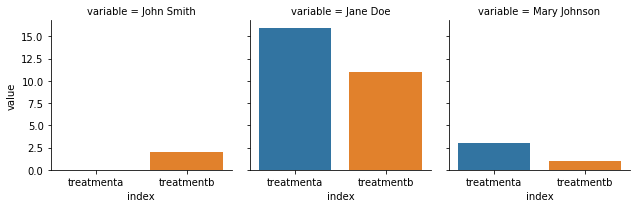

In [114]:
# sns.catplot(x='trt', y='result', col='name', 
#             kind='bar', data=tidy, height=2);

sns.catplot(x='index', y='value', col='variable',
           kind='bar', data=tidy2, height=3);

## Now with Instacart data

In [0]:
# products = pd.read_csv('products.csv')

# order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
#                             pd.read_csv('order_products__train.csv')])

# orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [117]:
print(products_data.columns.tolist())
print(orders_data.columns.tolist())
print(op_concat_data.columns.tolist())

['product_id', 'product_name', 'aisle_id', 'department_id']
['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
['order_id', 'product_id', 'add_to_cart_order', 'reordered']


In [122]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']
products_data[products_data['product_name'].isin(product_names)]

,product_id,product_name,aisle_id,department_id
9291,9292,Half And Half Ultra Pasteurized,84,16
30667,30668,Half Baked Frozen Yogurt,37,1


In [123]:
product_ids = products_data[products_data['product_name'].isin(product_names)]['product_id']
product_ids

9291      9292
30667    30668
Name: product_id, dtype: int64

In [126]:
# What 'condition' is
condition = op_concat_data['product_id'].isin(product_ids)
print(type(condition))
print(condition.head())

<class 'pandas.core.series.Series'>
0    False
1    False
2    False
3    False
4    False
Name: product_id, dtype: bool


In [0]:
df = op_concat_data[condition]

In [143]:
print(df.shape)
df.head()

(5978, 4)


,order_id,product_id,add_to_cart_order,reordered
536,64,9292,2,1
8829,917,30668,15,0
15849,1653,30668,3,0
17906,1883,9292,16,1
43094,4565,30668,2,0


In [0]:
# merge df with "product" data frame and "order" data frame to get columns 
# like 'order_hour_of_day', and more if necessary. I could merge to get 'product_name'
# after all the aggregations to save memory. But here there are only around 6000
# entries, so I am going to merge it now.

df = df[['product_id', 'order_id']].merge(orders_data[['order_id', 'order_hour_of_day']], how='inner', on='order_id')

In [145]:
df = df.sort_values(by=['product_id', 'order_id'])
df.head()

,product_id,order_id,order_hour_of_day
0,9292,64,16
3,9292,1883,11
6,9292,5625,9
10,9292,7765,14
11,9292,7906,9


In [146]:
df = df.merge(products_data[['product_id', 'product_name']], how='inner', on='product_id')
df.sample(10)

,product_id,order_id,order_hour_of_day,product_name
1896,9292,2157534,10,Half And Half Ultra Pasteurized
1117,9292,1247276,8,Half And Half Ultra Pasteurized
4975,30668,2276110,15,Half Baked Frozen Yogurt
1544,9292,1778103,7,Half And Half Ultra Pasteurized
2216,9292,2512364,15,Half And Half Ultra Pasteurized
278,9292,311506,14,Half And Half Ultra Pasteurized
5247,30668,2576273,17,Half Baked Frozen Yogurt
2101,9292,2403587,9,Half And Half Ultra Pasteurized
5591,30668,2978663,11,Half Baked Frozen Yogurt
5843,30668,3259818,10,Half Baked Frozen Yogurt


## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = df[df['product_id']==30668]
cream = df[df['product_id']==9292]

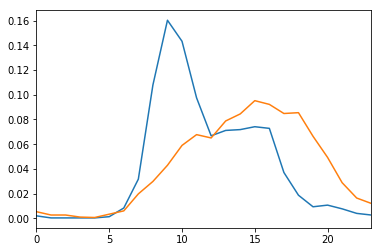

In [151]:
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index() # Sort object by labels (along an axis)
 .plot())

(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());

### 2. crosstab

In [155]:
ct = pd.crosstab(df['order_hour_of_day'], 
                 df['product_name'],
                 normalize='columns')
ct.head()

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.002003,0.005364
1,0.000334,0.002682
2,0.000334,0.002682
3,0.000000,0.001006
4,0.000334,0.000670


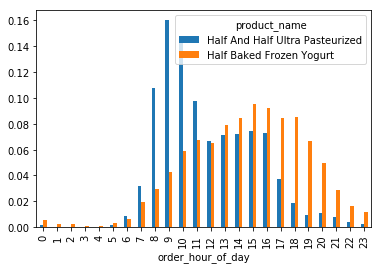

In [156]:
ct.plot(kind='bar');

### 3. Pivot Table

In [161]:
pt = df.pivot_table(index='order_hour_of_day', 
                    columns='product_name', 
                    values='order_id', 
                    aggfunc=len)
pt.tail()

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
19,28.0,198.0
20,32.0,147.0
21,23.0,86.0
22,12.0,49.0
23,8.0,36.0


### 4. melt

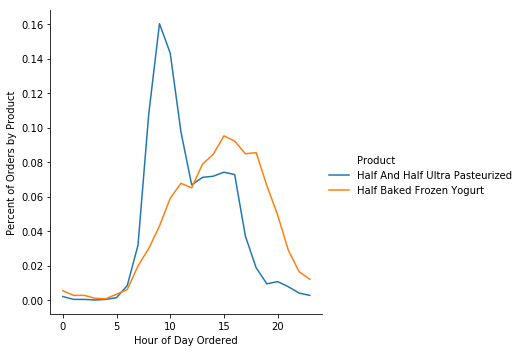

In [167]:
melted = (ct
 .reset_index()
 .melt(id_vars='order_hour_of_day')
 .rename(columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 }))

sns.relplot(x='Hour of Day Ordered', 
            y='Percent of Orders by Product', 
            hue='Product', 
            data=melted, 
            kind='line');

# Assignment

## Join Data Section

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [168]:
print(products_data.columns.tolist())
print(orders_data.columns.tolist())
print(op_concat_data.columns.tolist())

['product_id', 'product_name', 'aisle_id', 'department_id']
['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
['order_id', 'product_id', 'add_to_cart_order', 'reordered']


In [0]:
product_names = ['Banana',
                 'Bag of Organic Bananas',
                 'Organic Strawberries',
                 'Organic Baby Spinach',
                 'Organic Hass Avocado',
                 'Organic Avocado',
                 'Large Lemon',
                 'Strawberries',
                 'Limes',
                 'Organic Whole Milk']

In [170]:
product_ids = products_data[products_data['product_name'].isin(product_names)]['product_id']
product_ids

13175    13176
16796    16797
21136    21137
21902    21903
24851    24852
26208    26209
27844    27845
47208    47209
47625    47626
47765    47766
Name: product_id, dtype: int64

In [197]:
condition = op_concat_data['product_id'].isin(product_ids)
df = op_concat_data[condition]
df.sample(10)

,order_id,product_id,add_to_cart_order,reordered
14525810,1532737,47209,8,1
19103197,2014808,27845,4,1
24691913,2604086,24852,12,1
12296935,1297983,21137,2,1
25068038,2643896,21137,1,1
28185718,2972321,47209,11,1
32095148,3385362,47209,10,1
2782277,293612,47626,12,0
17637444,1860250,24852,1,1
5802243,612450,24852,3,1


In [176]:
print(op_concat_data.shape)
print(df.shape)

(33819106, 4)
(2418314, 4)


In [174]:
# what is order_number here?
orders_data.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [198]:
# I will merge to get 'product_name' after all the aggregations to save memory. 
op_freq = df['product_id'].value_counts()
op_freq = pd.DataFrame(op_freq).reset_index()
op_freq

,index,product_id
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877
5,47766,184224
6,47626,160792
7,16797,149445
8,26209,146660
9,27845,142813


In [199]:
# re-name columns
op_freq.columns = ['product_id', 'order_counts']
op_freq

,product_id,order_counts
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877
5,47766,184224
6,47626,160792
7,16797,149445
8,26209,146660
9,27845,142813


In [200]:
# merge to get product names
op_freq = op_freq.merge(products_data[['product_id', 'product_name']],
                        how='inner', on='product_id')
op_freq

,product_id,order_counts,product_name
0,24852,491291,Banana
1,13176,394930,Bag of Organic Bananas
2,21137,275577,Organic Strawberries
3,21903,251705,Organic Baby Spinach
4,47209,220877,Organic Hass Avocado
5,47766,184224,Organic Avocado
6,47626,160792,Large Lemon
7,16797,149445,Strawberries
8,26209,146660,Limes
9,27845,142813,Organic Whole Milk


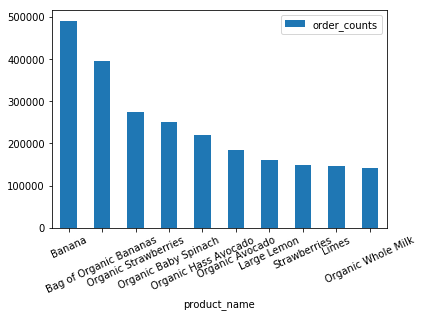

In [206]:
op_freq.plot(x='product_name', y='order_counts', kind='bar', rot=25);

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [229]:
##### YOUR CODE HERE #####
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [237]:
pt1 = flights.pivot_table(index='year', columns='month')
pt1

passengers                       ...                                    
month    January February March April  ... September October November December
year                                   ...                                    
1949         112      118   132   129  ...       136     119      104      118
1950         115      126   141   135  ...       158     133      114      140
1951         145      150   178   163  ...       184     162      146      166
1952         171      180   193   181  ...       209     191      172      194
1953         196      196   236   235  ...       237     211      180      201
1954         204      188   235   227  ...       259     229      203      229
1955         242      233   267   269  ...       312     274      237      278
1956         284      277   317   313  ...       355     306      271      306
1957         315      301   356   348  ...       404     347      305      336
1958         340      318   362   348  ...       404     359      310      337
1959         360      342   406   396  ...       463     407      362      405
1960         417      391   419   461  ...       508     461      390      432

[12 rows x 12 columns]

In [232]:
# error occured here. solution is in the next cell. but why is it?
pt1 = pt1.reset_index()

TypeError: ignored

In [247]:
# https://github.com/pandas-dev/pandas/issues/19136
pt1 = pt1.rename(columns=str).reset_index()
pt1.head(2)

index  year passengers           ...                                    
month                January February  ... September October November December
0         0  1949        112      118  ...       136     119      104      118
1         1  1950        115      126  ...       158     133      114      140

[2 rows x 14 columns]

In [239]:
pt1.columns.tolist()

[('year', ''),
 ('passengers', 'January'),
 ('passengers', 'February'),
 ('passengers', 'March'),
 ('passengers', 'April'),
 ('passengers', 'May'),
 ('passengers', 'June'),
 ('passengers', 'July'),
 ('passengers', 'August'),
 ('passengers', 'September'),
 ('passengers', 'October'),
 ('passengers', 'November'),
 ('passengers', 'December')]

In [250]:
# specify values='passengers' when calling pivot_table()
pt2 = flights.pivot_table(index='year', columns='month', values='passengers')
pt2.head(2)

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140


In [246]:
pt2 = pt2.reset_index()

TypeError: ignored

In [251]:
pt2 = pt2.rename(columns=str).reset_index()
pt2.head(2)

month,year,January,February,March,April,May,June,July,August,September,October,November,December
0,1949,112,118,132,129,121,135,148,148,136,119,104,118
1,1950,115,126,141,135,125,149,170,170,158,133,114,140


In [253]:
mt = pt2.melt(id_vars='year')
mt

,year,month,value
0,1949,January,112
1,1950,January,115
2,1951,January,145
3,1952,January,171
4,1953,January,196
5,1954,January,204
6,1955,January,242
7,1956,January,284
8,1957,January,315
9,1958,January,340


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)